In [3]:
import numpy as np
import pandas as pd
import glob


The commented out cells where me importing the data and concating it then downloading it for later use.

In [4]:
!git clone https://github.com/Caramel96/Samuel_BuckbyCE888.git

fatal: destination path 'Samuel_BuckbyCE888' already exists and is not an empty directory.


# Importing the data

In [5]:

local_path = '/content/Samuel_BuckbyCE888/Assigment_1/data/street crime'
all_files = glob.glob(local_path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)
street_crime = pd.concat(li, axis=0, ignore_index=True) 

local_path2 = '/content/Samuel_BuckbyCE888/Assigment_1/data/Stop_and_search_LC'
all_files2 = glob.glob(local_path2 + "/*.csv")
li2 = []
for filename2 in all_files2:
    df2 = pd.read_csv(filename2)
    li2.append(df2)
stop_search_lc = pd.concat(li2, axis=0, ignore_index=True)

local_path3 = '/content/Samuel_BuckbyCE888/Assigment_1/data/Stop_and_search_Met'
all_files3 = glob.glob(local_path3 + "/*.csv")
li3 = []
for filename3 in all_files3:
    df3 = pd.read_csv(filename3)
    li3.append(df3)
stop_search_met = pd.concat(li3, axis=0, ignore_index=True)

local_path4 = '/content/Samuel_BuckbyCE888/Assigment_1/data/Stop_Search_Man'
all_files4 = glob.glob(local_path4 + "/*.csv")
li4 = []
for filename4 in all_files4:
    df4 = pd.read_csv(filename4)
    li4.append(df4)
stop_search_man = pd.concat(li4, axis=0, ignore_index=True)

stop_search_lc['Force'] = 'Leicester'
stop_search_met['Force'] = 'Metropolitan'
stop_search_man['Force'] = 'Manchester'

stop_search = pd.concat([stop_search_lc,stop_search_met, stop_search_man])
confidence_police = pd.read_csv('/content/Samuel_BuckbyCE888/Assigment_1/data/confidence-in-the-local-police.csv', encoding= 'unicode_escape' )
arrests_data =  pd.read_csv('/content/Samuel_BuckbyCE888/Assigment_1/data/arrests-data-march-2013-to-march-2019-2.csv')
confidence_police.drop(labels=['Geography code','Geography_type', 'Ethnicity_type', 'Socio-economic classification', 'Household income', 'Time_type', 'Value_type'], axis=1, inplace=True)
stop_search_ethnicity = pd.read_csv('/content/Samuel_BuckbyCE888/Assigment_1/data/stop-and-search.csv')

#Pre processing the data 

In [6]:
stop_search['Date'] = pd.to_datetime(stop_search['Date'])
stop_search['Date'] = stop_search['Date'].dt.date
stop_search['Date'] = pd.to_datetime(stop_search['Date'])

In [7]:
confidence_police2 = confidence_police
confidence_police2['Value'] = confidence_police2['Value'].str.strip().map(lambda x: np.nan if x=="ALL" else x)
confidence_police2['Value'] = confidence_police2['Value'].str.strip().map(lambda x: np.nan if x=="?" else x)
confidence_police2.replace('All',np.NaN)
confidence_police2['Value'] = confidence_police2['Value'].astype(float)


In [8]:
stop_search.head()


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Force
0,Person search,2020-04-30,NaN,NaN,52.545480,-1.391003,Female,over 34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,Leicester
1,Person and Vehicle search,2020-05-01,NaN,NaN,52.543504,-1.387963,Female,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,Leicester
2,Person and Vehicle search,2020-05-01,NaN,NaN,52.543992,-1.390109,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,Leicester
3,Person search,2020-05-01,NaN,NaN,52.770012,-1.203193,Female,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,Leicester
4,Person search,2020-05-01,NaN,NaN,52.624815,-1.141081,Male,18-24,Black/African/Caribbean/Black British - African,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,NaN,False,Leicester


The data from manchester police only goes to 2019/06 where as the other two forces have data to the end of 2020. I chose 2018/2019 month ending march to get an unbias representation of stop and search counts and will later gather more data from other forces to analise

In [9]:
leic_2020 = (stop_search['Date'] < '2019-06-30') & (stop_search['Force'] == 'Leicester')
leic_2020 = stop_search.loc[leic_2020]

met_2020 = (stop_search['Date'] < '2019-06-30') & (stop_search['Force'] == 'Metropolitan')
met_2020  = stop_search.loc[met_2020 ]

man_2020 = (stop_search['Date'] < '2019-06-30') & (stop_search['Force'] == 'Manchester')
man_2020 = stop_search.loc[man_2020]

all_force = pd.concat([man_2020, leic_2020, met_2020 ])
all_force.shape

(289560, 16)

In [10]:
a = len(leic_2020[leic_2020['Officer-defined ethnicity'].isin(['Black', 'Asian', 'Other'])]) / 163201 * 1000
b = len(leic_2020[leic_2020['Officer-defined ethnicity'].isin(['White'])]) / 166636 * 1000
c = len(met_2020[met_2020['Officer-defined ethnicity'].isin(['Black', 'Asian', 'Other'])]) / 4504657 * 1000
d = met_2020['Officer-defined ethnicity'].value_counts().White / 3669284 * 1000
e = len(man_2020[man_2020['Officer-defined ethnicity'].isin(['Black', 'Asian', 'Other'])]) / 434405 * 1000
f = man_2020['Officer-defined ethnicity'].value_counts().White / 2248123 * 1000

data = {'Bame Rates':  [a, c, e],
        'White Rates': [b, d,f],
        'City' : ['Leicester','Metro','Manchester']}

df_rate_thousand = pd.DataFrame(data)
df_rate_thousand = df_rate_thousand.set_index('City')
df_rate_thousand2 = df_rate_thousand


#results and findings

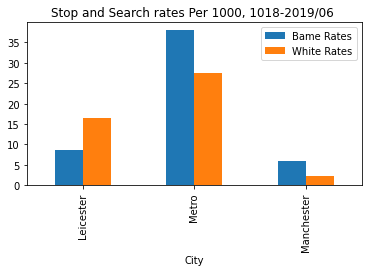

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plot = df_rate_thousand.plot(kind='bar', figsize=(6,3), title='Stop and Search rates Per 1000, 1018-2019/06 ')
fig = plot.get_figure()
fig.savefig("output.png")

In [13]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100
df_rate_thousand2['Percentage change'] = percentage_change(df_rate_thousand2['Bame Rates'],df_rate_thousand2['White Rates'])


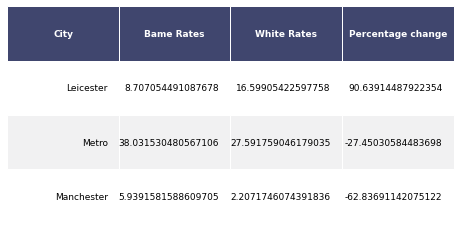

In [15]:

df = df_rate_thousand2
df = df.reset_index()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, col_width=5.0, row_height=1, font_size=9,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns=0, col_width=2.0)

In [16]:
bame = all_force[all_force['Officer-defined ethnicity'].isin(['Black', 'Asian', 'Other'])]
white = all_force[all_force['Officer-defined ethnicity'] == 'White']

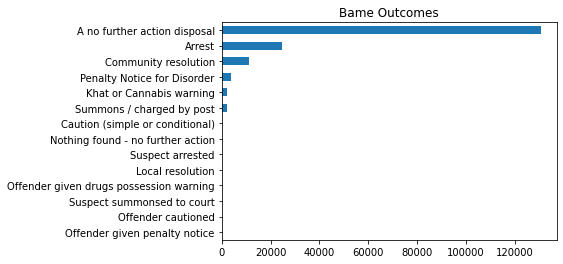

In [17]:
plot = bame.Outcome.value_counts().sort_values().plot(kind = 'barh', title= 'Bame Outcomes')
fig = plot.get_figure()
fig.savefig("output.png")

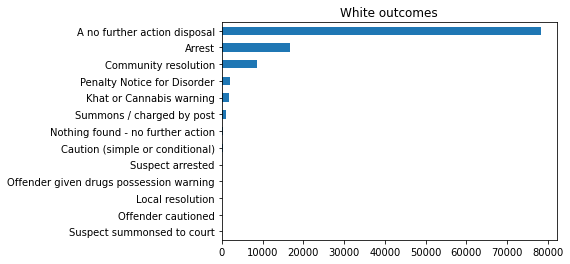

In [18]:
plot = white.Outcome.value_counts().sort_values().plot(kind = 'barh', title='White outcomes')
fig = plot.get_figure()
fig.savefig("output.png")

In [19]:
bame2 = confidence_police2[confidence_police2['Ethnicity'].isin(['Black', 'Asian', 'Other'])]
white2 = confidence_police2[confidence_police2['Ethnicity'] == 'White']

In [20]:
bame2 = bame2[bame2['Geography'].isin(['Leicestershire', 'Greater Manchester', 'City of London / Metropolitan Police' ])]
white2 = white2[white2['Geography'].isin(['Leicestershire', 'Greater Manchester', 'City of London / Metropolitan Police' ])]

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 3600x1800 with 0 Axes>

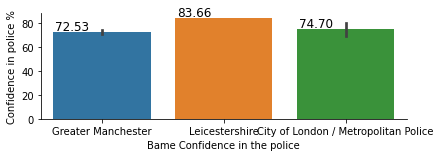

In [22]:
plt.figure(figsize=(50, 25))
g = sns.catplot(data=bame2,kind='bar', x="Geography", y="Value", size=2, aspect=3)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
g.set(xlabel='Bame Confidence in the police', ylabel='Confidence in police %')
g.savefig("output.png")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 3600x1800 with 0 Axes>

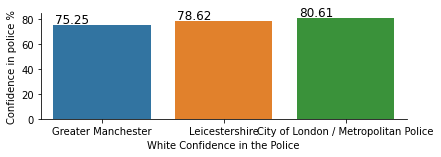

In [23]:
plt.figure(figsize=(50, 25))
g = sns.catplot(data=white2,kind='bar', x="Geography", y="Value", size=2, aspect=3)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
g.set(xlabel='White Confidence in the Police', ylabel='Confidence in police %')
g.savefig("output.png")
plt.show()

In [24]:
stop_search_ethnicity.head()

,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Geography,Geography_type,Number of stop and searches,Total number of stop and search carried out in this year in this area (excluding cases where the ethnicity was unreported),Population by ethnicity,"Rate per 1,000 population by ethnicity",Proportion of total stop and searches of this ethnicity in the financial year (excludes unreported),Notes
0,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Avon & Somerset,Police Force Area,"15,018","9,050","1,599,555",9.39,NaN,NaN
1,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Bedfordshire,Police Force Area,"4,768","4,279","615,061",7.75,NaN,NaN
2,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Cambridgeshire,Police Force Area,"8,773","8,582","804,841",10.9,NaN,NaN
3,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Cheshire,Police Force Area,"6,472","6,390","1,027,709",6.3,NaN,NaN
4,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Cleveland,Police Force Area,"12,137","11,453","557,227",21.78,NaN,NaN
